## <b><div style='padding:30px;background-color:#001BC7;color:white;border-radius:80px;font-size:150%;text-align: center'>30 Indian Cities</div></b>

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/30-indian-cities-information-technology-dataset/ICT_Subdimension_Dataset.csv


## <b><div style='padding:15px;background-color:#001BC7;color:white;border-radius:40px;font-size:110%;text-align: center'>1  |  About Dataset</div></b>

**This dataset contains comprehensive information on various digital infrastructure metrics for multiple Indian cities from 2019 to 2024. It includes data on household internet access, fixed and wireless broadband subscriptions, smart water and electricity meters, public transport information systems, traffic monitoring, and more. The dataset is valuable for analyzing the progress and development of smart city initiatives in India over the specified period.**

## <b><div style='padding:15px;background-color:#001BC7;color:white;border-radius:40px;font-size:110%;text-align: center'>2  |  Importing Libraries</div></b>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

## <b><div style='padding:15px;background-color:#001BC7;color:white;border-radius:40px;font-size:110%;text-align: center'>3  |  Downloading Dataset</div></b>

In [3]:
df = pd.read_csv('/kaggle/input/30-indian-cities-information-technology-dataset/ICT_Subdimension_Dataset.csv')

In [4]:
# Check Dataset

print('### first 5 lines ###','\n')
df.head()

### first 5 lines ### 



,City,Year,Household Internet Access (%),Fixed Broadband Subscriptions (%),Wireless Broadband Subscriptions (%),Wireless Broadband Coverage 3G (%),Wireless Broadband Coverage 4G (%),Smart Water Meters (%),Smart Electricity Meters (%),Dynamic Public Transport Information (%),Traffic Monitoring (%),Availability of WIFI in Public Areas (count),Water Supply ICT Monitoring (%),Drainage / Storm Water System ICT Monitoring (%),Electricity Supply ICT Monitoring (%),Demand Response Penetration (%),Intersection Control (%),Open data (%),e-Government (%),Public Sector e-procurement (%)
0,Mumbai,2019,79.45,48.00,50.35,91.57,59.19,33.30,43.4,10.04,15.30,137,31.31,20.72,33.88,10.05,15.48,4.85,19.07,24.20
1,Mumbai,2020,79.45,54.26,53.38,92.58,64.12,34.34,43.4,14.06,20.40,172,36.53,24.86,38.72,13.06,18.57,6.79,22.88,29.04
2,Mumbai,2021,80.43,54.26,60.42,93.60,69.06,34.34,43.4,18.08,25.49,167,41.74,29.00,43.56,16.08,21.67,8.73,26.70,33.88
3,Mumbai,2022,86.32,54.26,66.47,94.62,73.99,34.34,43.4,22.09,30.59,142,46.96,33.15,48.40,19.09,24.76,10.67,30.51,38.73
4,Mumbai,2023,86.32,54.26,66.47,95.64,78.92,35.38,43.4,26.11,35.69,143,52.18,37.29,53.24,22.11,27.86,12.61,34.32,43.57


## <b><div style='padding:15px;background-color:#001BC7;color:white;border-radius:40px;font-size:110%;text-align: center'>4  |  Inspecting and Cleaning Dataframe Structure</div></b>

In [5]:
# Dataframe summary

def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summ['Missing#'] = df.isna().sum()
    summ['Missing%'] = (df.isna().sum())/len(df)
    summ['Dups'] = df.duplicated().sum()
    summ['Uniques'] = df.nunique().values
    summ['Count'] = df.count().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['Min'] = desc['min'].values
    summ['Max'] = desc['max'].values
    summ['Average'] = desc['mean'].values
    summ['Standard Deviation'] = desc['std'].values
    summ['First Value'] = df.loc[0].values
    summ['Second Value'] = df.loc[1].values
    summ['Third Value'] = df.loc[2].values

    display(summ)
    
summary(df)

data shape: (180, 20)


,Data Type,Missing#,Missing%,Dups,Uniques,Count,Min,Max,Average,Standard Deviation,First Value,Second Value,Third Value
City,object,0,0.0,0,30,180,NaN,NaN,NaN,NaN,Mumbai,Mumbai,Mumbai
Year,int64,0,0.0,0,6,180,2019.0,2024.0,2021.5,1.712589,2019,2020,2021
Household Internet Access (%),float64,0,0.0,0,121,180,53.65,92.63,72.998167,8.984674,79.45,79.45,80.43
Fixed Broadband Subscriptions (%),float64,0,0.0,0,115,180,23.97,60.72,45.900444,8.389596,48.0,54.26,54.26
Wireless Broadband Subscriptions (%),float64,0,0.0,0,121,180,33.0,72.88,56.287444,8.716689,50.35,53.38,60.42
Wireless Broadband Coverage 3G (%),float64,0,0.0,0,167,180,85.57,99.56,93.239944,3.124068,91.57,92.58,93.6
Wireless Broadband Coverage 4G (%),float64,0,0.0,0,178,180,57.11,88.28,72.326944,8.791971,59.19,64.12,69.06
Smart Water Meters (%),float64,0,0.0,0,111,180,9.92,47.24,29.933278,7.813442,33.3,34.34,34.34
Smart Electricity Meters (%),float64,0,0.0,0,102,180,16.99,56.83,35.485389,9.65294,43.4,43.4,43.4
Dynamic Public Transport Information (%),float64,0,0.0,0,173,180,9.5,31.46,20.019389,6.886342,10.04,14.06,18.08


In [6]:
# Deleting unnecessary columns
df.drop(["Availability of WIFI in Public Areas (count)"], axis=1, inplace=True)

In [7]:
# Creating a column with the average of all features.
f = lambda x: sum(x[2:])
df['Mean'] = ((df.apply(f, axis = 1)) / 17).round(2)

## <b><div style='padding:15px;background-color:#001BC7;color:white;border-radius:40px;font-size:110%;text-align: center'>5  |  EDA</div></b>

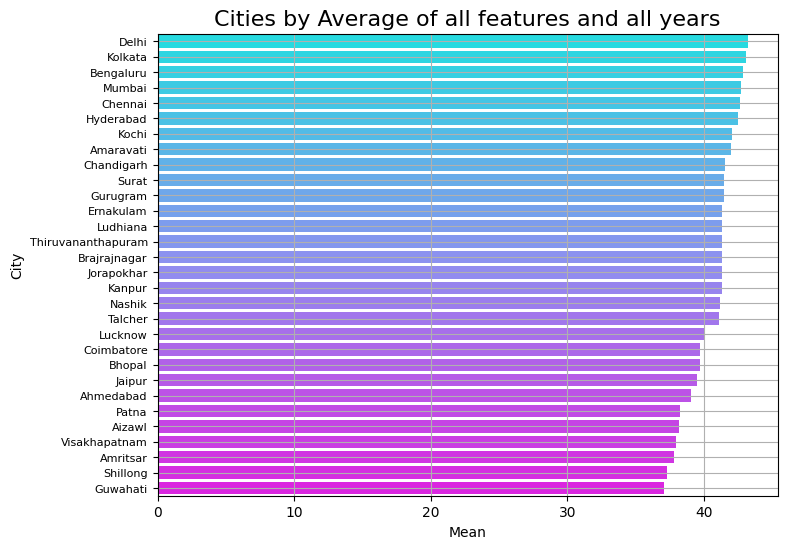

In [8]:
# Cities by Average of all features and all years

fig, ax = plt.subplots(figsize=(8, 6))
df_city = df.groupby(['City'])[['Mean']].mean()
df_city.reset_index(level=0, inplace=True)
df_city = df_city.sort_values("Mean", axis = 0, ascending = False)
sns.barplot(data=df_city, y="City", x="Mean", palette = 'cool')
plt.title("Cities by Average of all features and all years", fontsize = 16)
plt.yticks(rotation=0, fontsize = 8)
plt.grid()
plt.show()

In [9]:
df_year = df.groupby(['Year', 'City'])[['Mean']].mean().reset_index()

df_year.head()

,Year,City,Mean
0,2019,Ahmedabad,30.99
1,2019,Aizawl,30.50
2,2019,Amaravati,32.25
3,2019,Amritsar,29.49
4,2019,Bengaluru,34.78


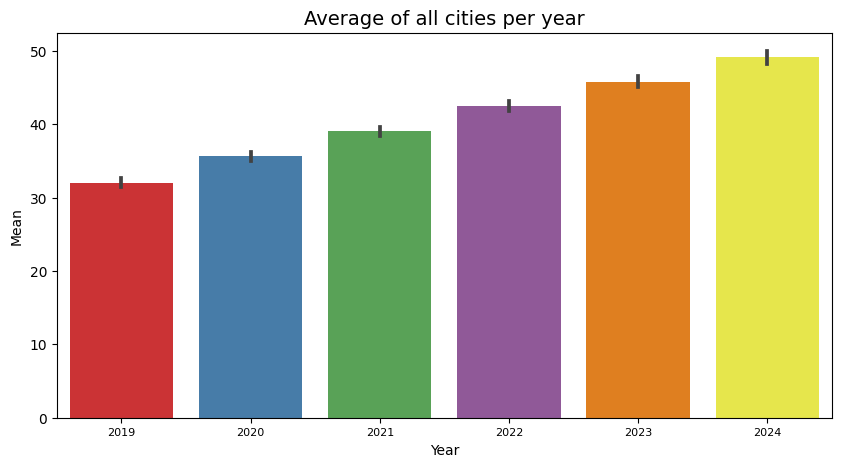

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=df_year, x = 'Year', y = 'Mean', palette = 'Set1')
plt.title("Average of all cities per year", fontsize = 14)
plt.xticks(rotation=0, fontsize = 8)
plt.show()

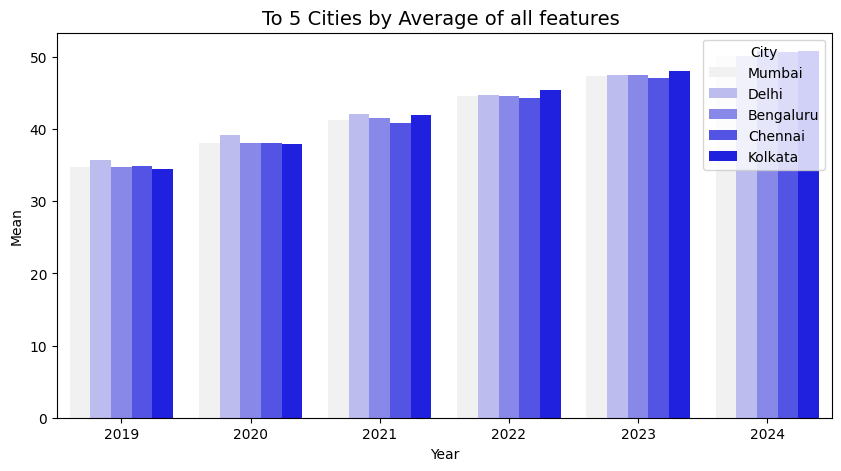

In [11]:
# Top 5 Cities
options = ['Delhi', 'Kolkata', 'Bengaluru', 'Mumbai', 'Chennai']

# selecting rows based on condition
df_top = df.loc[df['City'].isin(options)]

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=df_top, x="Year", y="Mean", hue="City", color = 'blue')
plt.title("To 5 Cities by Average of all features ", fontsize = 14)
plt.show()

In [12]:
cols = ['Household Internet Access (%)',
       'Fixed Broadband Subscriptions (%)',
       'Wireless Broadband Subscriptions (%)',
       'Wireless Broadband Coverage 3G (%)',
       'Wireless Broadband Coverage 4G (%)', 'Smart Water Meters (%)',
       'Smart Electricity Meters (%)',
       'Dynamic Public Transport Information (%)', 'Traffic Monitoring (%)',
       'Water Supply ICT Monitoring (%)',
       'Drainage / Storm Water System ICT Monitoring (%)',
       'Electricity Supply ICT Monitoring (%)',
       'Demand Response Penetration (%)', 'Intersection Control (%)',
       'Open data (%)', 'e-Government (%)', 'Public Sector e-procurement (%)']

colors = ["#8c0404","#f25ed0","#21618C","#16A085","#34495E",
          "#C70039", "#FF5733", "#FFC300", "#DAF7A6", "#B3B6B7",
          '#6495ED', '#40E0D0', '#9FE2BF', '#CCCCFF']

In [13]:
# Let's create a dataframe just for the year 2024
df_2024 = df[df['Year'] == 2024]
df_2024.head()

,City,Year,Household Internet Access (%),Fixed Broadband Subscriptions (%),Wireless Broadband Subscriptions (%),Wireless Broadband Coverage 3G (%),Wireless Broadband Coverage 4G (%),Smart Water Meters (%),Smart Electricity Meters (%),Dynamic Public Transport Information (%),Traffic Monitoring (%),Water Supply ICT Monitoring (%),Drainage / Storm Water System ICT Monitoring (%),Electricity Supply ICT Monitoring (%),Demand Response Penetration (%),Intersection Control (%),Open data (%),e-Government (%),Public Sector e-procurement (%),Mean
5,Mumbai,2024,86.32,54.26,67.47,96.65,83.85,35.38,43.40,30.13,40.79,57.40,41.43,58.08,25.12,30.95,14.55,38.14,48.41,50.14
11,Delhi,2024,88.62,56.62,65.61,93.93,83.61,38.33,42.67,30.35,41.18,52.50,41.32,61.36,24.14,31.27,14.60,38.61,48.00,50.16
17,Bengaluru,2024,92.63,56.26,69.93,99.55,82.42,37.96,42.35,28.78,38.69,57.30,39.29,62.95,24.20,28.65,14.34,40.75,47.95,50.82
23,Hyderabad,2024,86.82,60.00,56.54,94.07,87.49,35.18,40.12,30.34,38.05,56.56,38.80,57.71,24.73,28.99,14.26,41.93,48.57,49.42
29,Chennai,2024,87.74,56.68,66.79,97.99,87.62,40.45,43.32,31.42,40.96,54.51,38.56,58.96,24.59,29.29,14.44,39.41,47.78,50.62


In [14]:
# Cities with the highest "cols" - 2024

for i in cols:
    
    if i == 'Household Internet Access (%)':

        df_top = df_2024.groupby(['City'])[['Household Internet Access (%)']].mean()
        df_top = df_top.sort_values(by=("Household Internet Access (%)"), ascending=False).head(14)

        iplot(px.bar(df_top[:14],
             text_auto = True,
             color = df_top[:14].index,
             color_discrete_sequence = colors, 
             labels=dict(index="Count Names",value=""),
             title = 'Cities with the highest Household Internet Access (%) - 2024'
            ))   
    
    else:
        
        df_top = df_2024.groupby(['City'])[[i]].mean()
        df_top = df_top.sort_values(by=[i], ascending=False).head(14)

        iplot(px.bar(df_top[:14],
             text_auto = True,
             color = df_top[:14].index,
             color_discrete_sequence = colors, 
             labels=dict(index="Count Names",value=""),
             title = 'Cities with the highest ' +i+ ' - 2024'
             ))

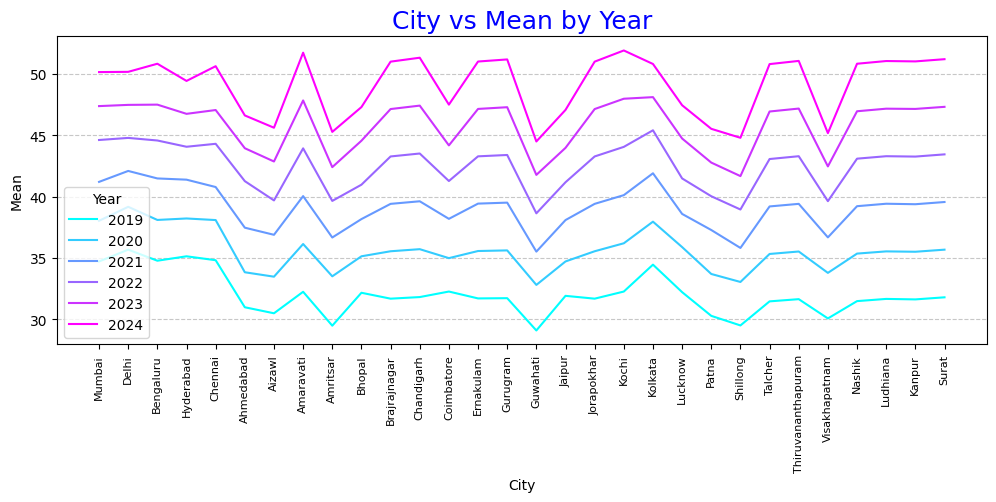

In [15]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.lineplot(data=df, x="City", y="Mean", hue="Year", palette = 'cool')
plt.title("City vs Mean by Year", fontsize = 18, color = 'blue')
plt.xticks(rotation=90, fontsize = 8)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

<b><div style='padding:15px;background-color:#001BC7;color:white;border-radius:40px;font-size:110%;text-align: center'>We can see throughout EDA and mainly from the graph above, that all 30 cities improved their information and technology services between the years 2019 and 2024. Furthermore, it is visible that the levels presented in 2019 increased almost equivalently year after year in all cities. Each line representing 1 year practically repeats its format in the following years. This allows us to conclude that the improvement in services is more of an action by the country as a whole than isolated actions in each city.</div></b>

## <b><div style='padding:15px;background-color:#001BC7;color:white;border-radius:40px;font-size:110%;text-align: center'>If you liked it, please upvote. Thank you very much.</div></b>